In [94]:
import os
import numpy as np
import cv2
import pickle
import glob
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
from moviepy.editor import VideoFileClip
from IPython.display import HTML

%matplotlib inline

print('...')

...


## Read all the images

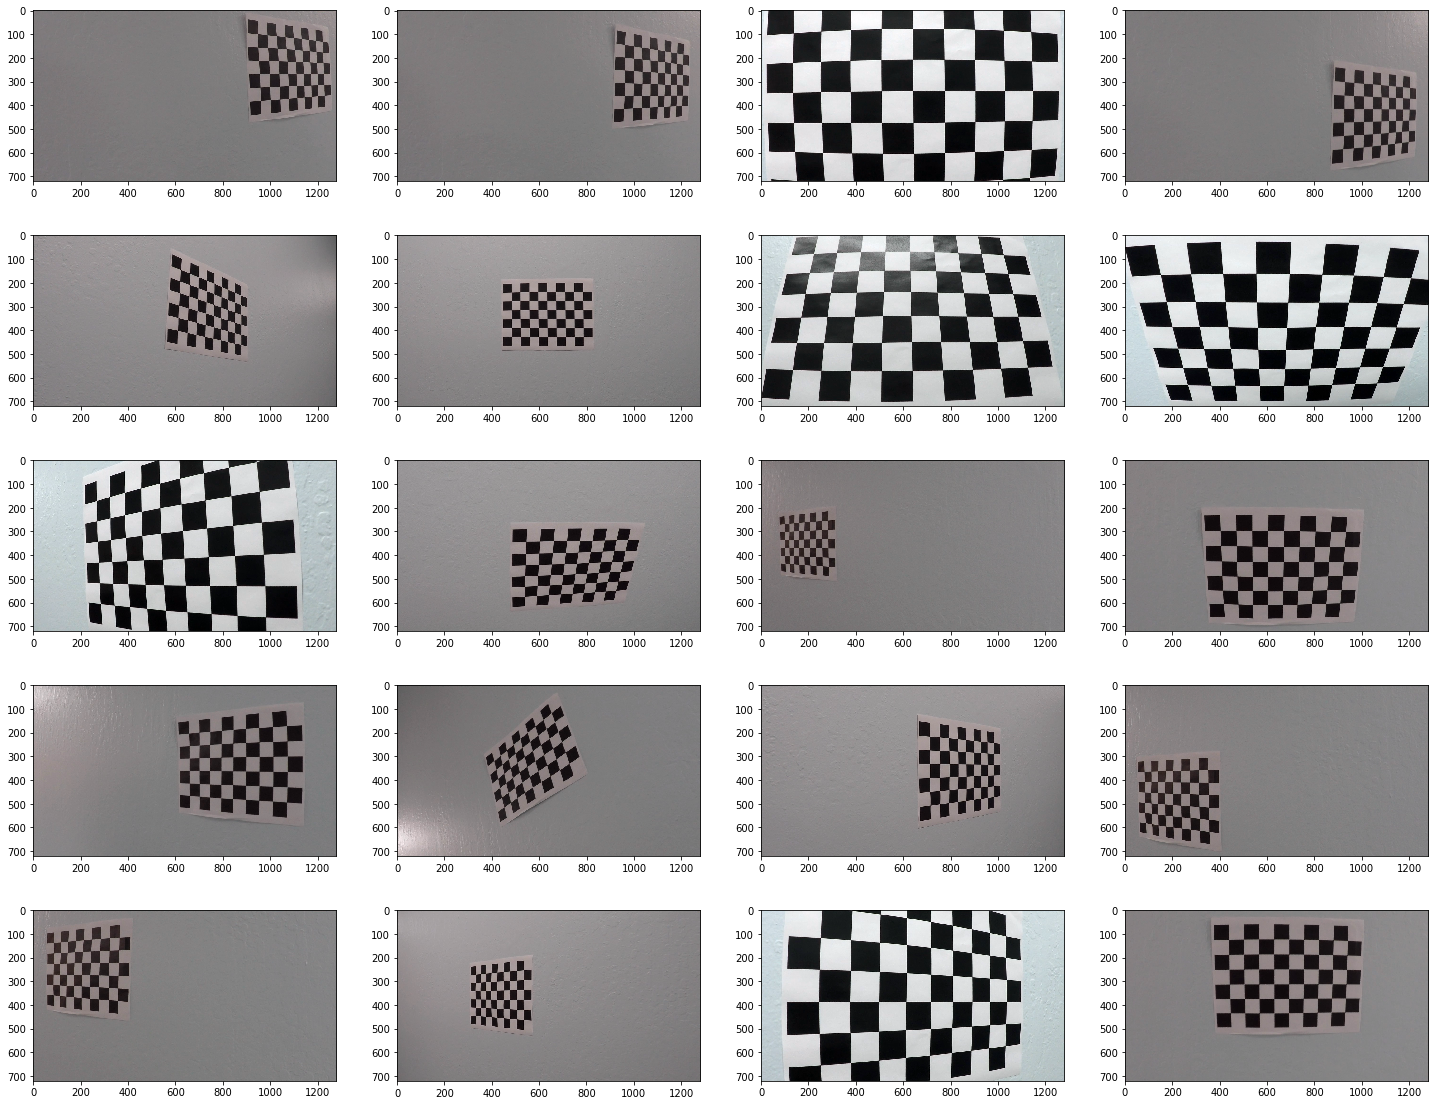

In [2]:
images = glob.glob('./camera_cal/calibration*.jpg')

fig, ax = plt.subplots(5, 4)
fig.set_size_inches(25, 20)

for axis, file in zip(ax.flat, images):
    image = cv2.imread(file)
    axis.imshow(image)

## Develope the code to find corners of one image of a chess board

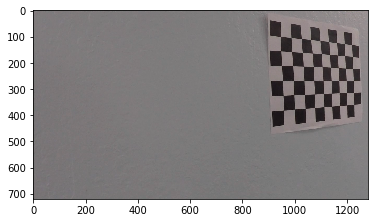

In [57]:
image = cv2.imread(images[0])
plt.imshow(image)
# images

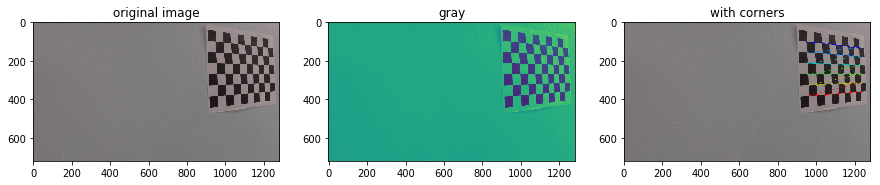

In [58]:
nx = 9
ny = 6

# image = cv2.imread(images[8])
# plt.imshow(image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
if ret == True:
    fig, ax = plt.subplots(1, 3)
    fig.set_size_inches(15, 8)
    
    ax[0].imshow(image)
    ax[0].set_title('original image')
    
    ax[1].imshow(gray)
    ax[1].set_title('gray')
    
    cv2.drawChessboardCorners(image, (nx, ny), corners, ret)
    ax[2].imshow(image)
    ax[2].set_title('with corners')


## Find corners in all the images of a chess board using a for loop

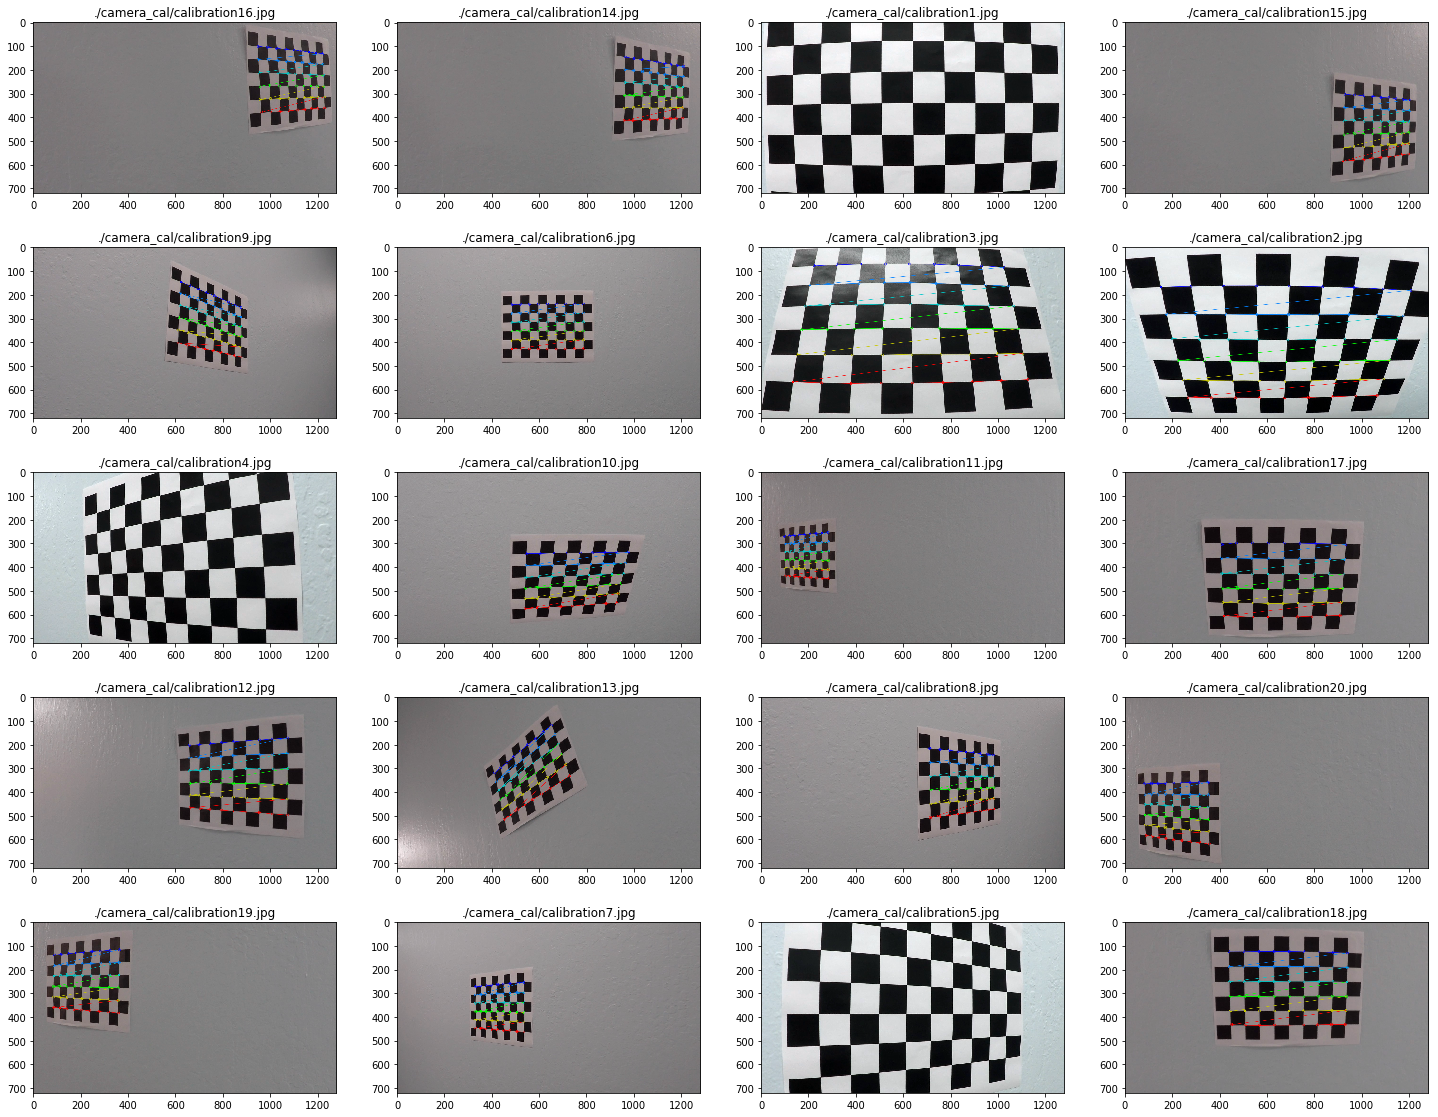

In [59]:
fig, ax = plt.subplots(5, 4)
fig.set_size_inches(25, 20)

for axis, file in zip(ax.flat, images):
    image = cv2.imread(file)
    nx = 9
    ny = 6
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    if ret == True:
        cv2.drawChessboardCorners(image, (nx, ny), corners, ret)
    axis.imshow(image)
    axis.set_title(file)

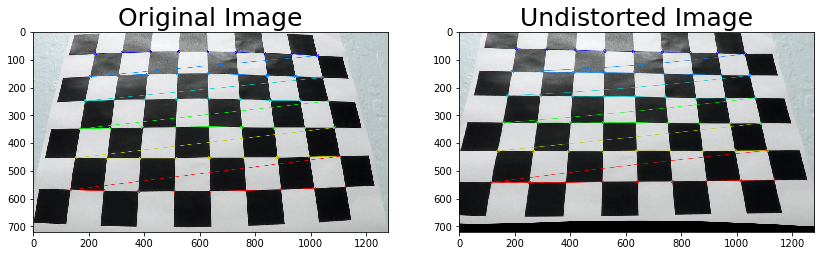

In [83]:
objpoints = []
imgpoints = []
objp=np.zeros((6*9,3),np.float32)
objp[:,:2]=np.mgrid[0:9,0:6].T.reshape(-1,2)

image = cv2.imread(images[6])


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
if ret == True:
    imgpoints.append(corners)
    objpoints.append(objp)
        
    cv2.drawChessboardCorners(image, (nx, ny), corners, ret)
   

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, image.shape[1:], None, None)
    undist = cv2.undistort(image, mtx, dist, None, mtx)  
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(14, 9)
    ax[0].imshow(image)
    ax[0].set_title('Original Image', fontsize=25)
    ax[1].imshow(undist)
    ax[1].set_title('Undistorted Image', fontsize = 25)
    


In [133]:


for file in images:
    image = cv2.imread(file)
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)

        cv2.drawChessboardCorners(image, (nx, ny), corners, ret)


        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, image.shape[1:], None, None)
        undist = cv2.undistort(image, mtx, dist, None, mtx)  
        cv2.imwrite(os.path.join('./output_images', 'out_'+file[13:]), image)
        

In [91]:
'undistorted_'+file[13:]

'undistorted_calibration18.jpg'

In [130]:
cv2.imwrite(os.path.join('./output_images', 'out_'+file[13:]), image)

True